# Maths for the Helmholtz GP
*cf.* [Berlingheiri et al., 2023](https://arxiv.org/pdf/2302.10364):
$$
\mathbf{u}\sim GP(0, K_{helm})
$$

where

$$
K_{helm} = K_{\psi\psi} + K_{\phi\phi}
$$
i.e. a rotational plus irrotational/divergent component

$$
K_{\psi\psi} = 
\begin{bmatrix}
\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'} & 
-\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} \\
-\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} & 
\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'}
\end{bmatrix}
$$

$$
K_{\phi\phi} = 
\begin{bmatrix}
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'} & 
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} \\
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} & 
\frac{\partial^2K_\phi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'}
\end{bmatrix}
$$

where
$
K_{\psi} = k_{\psi}(\mathbf{x}, \mathbf{x'}; \theta_{\psi})
$
and
$
K_{\phi} = k_{\phi}(\mathbf{x}, \mathbf{x'}; \theta_{\phi})
$
are plain old parametric GP kernels.

# 1D kernel

In [2]:
from sympy import *
x, x_p, ℓ = symbols('x x_p ℓ')

init_printing(use_unicode=True)

In [2]:
# F = exp(-(sqrt((x-x_p)**2)/(ℓ))**2)
#d = sqrt((x-x_p)**2)
# d = abs(x-x_p)

tau = Function('tau')
d = tau(x, x_p)
F = exp(-(d/ℓ)**1)

F

In [3]:
dF_dx = diff(F, x)
dF_dx

In [4]:
dF_dxp = diff(F, x_p)
dF_dxp

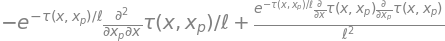

In [5]:
d2F_dxdxp = diff(dF_dx, x_p)
d2F_dxdxp

In [6]:
d = sqrt((x-x_p)**2 + (y-y_p)**2)
#d = (x-x_p)**2 + (y-y_p)**2

print(diff(d, x))

NameError: name 'y' is not defined

In [7]:
print(diff(d, y))


NameError: name 'y' is not defined

In [275]:
print(diff(d, x_p))

(-x + x_p)/sqrt((x - x_p)**2 + (y - y_p)**2)


In [276]:
print(diff(d, y_p))

(-y + y_p)/sqrt((x - x_p)**2 + (y - y_p)**2)


# 2D kernel

In [3]:
x, y, x_p, y_p, ℓ, ℓ_t, ν = symbols('x y x_p y_p ℓ ℓ_t ν')


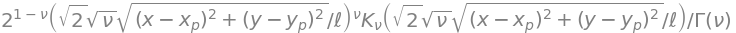

In [31]:
#d = sqrt((x-x_p)**2 + (y-y_p)**2)
d = (x-x_p)**2 + (y-y_p)**2

#tau = Function('tau')
#d = tau(x, x_p, y, y_p)
#F = exp(-(1/2)*(d/ℓ)**2) # Square-exp
#F = exp(-(1/2)*sqrt(d)/ℓ) # matern 1/2 i.e. exponential
#F = exp(-d/ℓ) # matern 1/2 i.e. exponential

#F = exp(-(1/2)*(d/ℓ)**ν) # Gamma-exp
# F = exp(-(1/2)*(d/ℓ)**γ) * cos(d/ℓ_t) # Gamma-exp * cosine
# cff = sqrt(3)*d/ℓ 
# F = (1+cff)*exp(-cff)#Matern32

# Matern function
#x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')
#d = sqrt((x-x_p)**2 + (y-y_p)**2)
#F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*d/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*d/ℓ)
F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*sqrt(d)/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*sqrt(d)/ℓ)

F


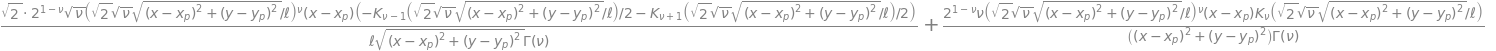

In [32]:
dF_dx = diff(F, x)
dF_dx

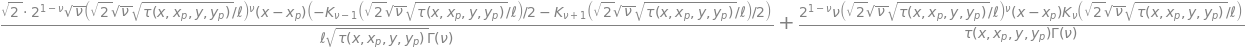

In [33]:
tau = Function('tau')
#dF_dx.replace((x-x_p)**2 + (y-y_p)**2, tau(x, x_p, y, y_p))
dF_dx.replace(d, tau(x, x_p, y, y_p))

In [34]:
ccode(dF_dx.replace(d, tau(x, x_p, y, y_p)))

'/* Not supported in C: */\n/* besselk */\n/* besselk */\n/* besselk */\n/* tau */\nM_SQRT2*pow(2, 1 - ν)*sqrt(ν)*pow(M_SQRT2*sqrt(ν)*sqrt(tau(x, x_p, y, y_p))/ℓ, ν)*(x - x_p)*(-1.0/2.0*besselk(ν - 1, sqrt(2)*sqrt(ν)*sqrt(tau(x, x_p, y, y_p))/ℓ) - 1.0/2.0*besselk(ν + 1, sqrt(2)*sqrt(ν)*sqrt(tau(x, x_p, y, y_p))/ℓ))/(ℓ*sqrt(tau(x, x_p, y, y_p))*tgamma(ν)) + pow(2, 1 - ν)*ν*pow(M_SQRT2*sqrt(ν)*sqrt(tau(x, x_p, y, y_p))/ℓ, ν)*(x - x_p)*besselk(ν, sqrt(2)*sqrt(ν)*sqrt(tau(x, x_p, y, y_p))/ℓ)/(tau(x, x_p, y, y_p)*tgamma(ν))'

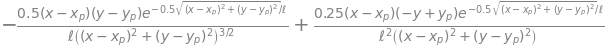

In [35]:
d2F_dydyp = diff(dF_dy, y_p)
d2F_dydyp

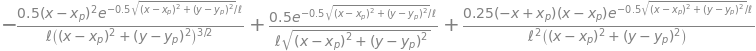

In [36]:
d2F_dydxp = diff(dF_dy, x_p)
d2F_dydxp

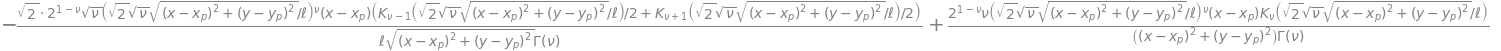

In [37]:
dF_dx = diff(F, x)
simplify(dF_dx)

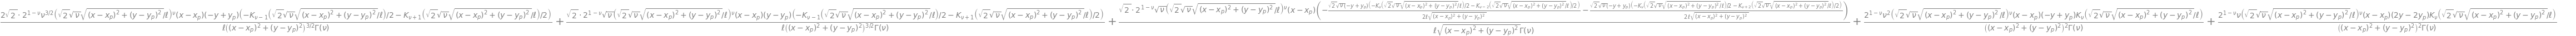

In [38]:
d2F_dxdyp = diff(dF_dx, y_p)
d2F_dxdyp

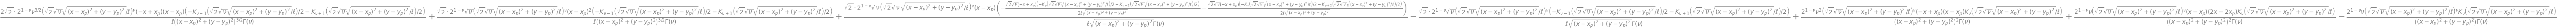

In [39]:
d2F_dxdxp = diff(dF_dx, x_p)
d2F_dxdxp

In [40]:
%%time

import numpy as np
from scipy.special import kv as K_nu
from scipy.special import gamma as gamma_sp

def mysqrt(x):
    return np.sqrt(x)


def mybesselk(nu,x):
    #print('besselk')
    xp = 1*x
    xp[x<1e-15] = 1e-15
    return K_nu(nu, xp)

def mygamma(x):
    #print('mygamma')
    if x < 1e-15:
        return 0.
    else:
        return gamma_sp(x)

def mytau(xn, xn_p, yn, yn_p):
    print('mytau')
    d = (xn-xn_p)**2 + (yn-yn_p)**2

    if d < 1e-10:
        return 1e-10
    else:
        return d
    
module = [{'sqrt': mysqrt,'besselk':mybesselk,'gamma':mygamma, 'tau':mytau}, 'numpy']
# f = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydyp, modules=module)
# f = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdyp, modules=module)
# f = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp, modules=module)
f = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydxp.replace(d, tau(x, x_p, y, y_p)), modules=module)
f
f(0,0,0,0, 100 , 2.)
#k = f(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, 100, 2.)
#k.shape
#mybesselk(2., np.array([0., 1e-4]))

mytau
mytau
mytau
mytau
mytau
mytau
CPU times: user 63.8 ms, sys: 0 ns, total: 63.8 ms
Wall time: 62.6 ms


In [286]:
ccode(d2F_dxdxp)

'/* Not supported in C: */\n/* tau */\n-0.5*pow(x - x_p, 2)*exp(-0.5*tau(x, x_p, y, y_p)/ℓ)/(ℓ*pow(pow(x - x_p, 2) + pow(y - y_p, 2), 3.0/2.0)) + 0.5*exp(-0.5*tau(x, x_p, y, y_p)/ℓ)/(ℓ*sqrt(pow(x - x_p, 2) + pow(y - y_p, 2))) + 0.25*(-x + x_p)*(x - x_p)*exp(-0.5*tau(x, x_p, y, y_p)/ℓ)/(pow(ℓ, 2)*(pow(x - x_p, 2) + pow(y - y_p, 2)))'

In [90]:
#https://stackoverflow.com/questions/78063283/how-to-use-numpy-as-default-for-code-generation-in-sympy
import sympy.printing.numpy as spn
class NumPyPrinter(spn.NumPyPrinter):
    def __init__(self, settings=None, module='numpy'):
        self._module = module
        m = module + "."
        self._kf = {k: m + v for k, v in spn._known_functions_numpy.items()}
        self._kc = {k: m + v for k, v in spn._known_constants_numpy.items()}
        
        super().__init__(settings=settings)


ptr = NumPyPrinter(module='np')
ptr.doprint(d2F_dxdxp)

'1.0*np.exp(-0.5*((x - x_p)**2 + (y - y_p)**2)/ℓ**2)/ℓ**2 + 0.25*(-2*x + 2*x_p)*(2*x - 2*x_p)*np.exp(-0.5*((x - x_p)**2 + (y - y_p)**2)/ℓ**2)/ℓ**4'

# Bake it into a GPTIDE covariance kernel

In [123]:
import numpy as np
from scipy.special import kv as K_nu
from scipy.special import gamma as gamma_sp


def mysqrt(x):
    return np.sqrt(x)


def mybesselk(nu,x):
    #print('besselk')
    xp = 1*x
    xp[x<1e-15] = 1e-15
    return K_nu(nu, xp)

def mygamma(x):
    #print('mygamma')
    if x < 1e-15:
        return 0.
    else:
        return gamma_sp(x)

    
    
class kernel_psi_2d(object):
    """
    $$
    K_{\psi\psi} = 
    \begin{bmatrix}
    \frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial y'} & 
    -\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial y \partial x'} \\
    -\frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial y'} & 
    \frac{\partial^2K_\psi (\mathbf{x}, \mathbf{x'})}{\partial x \partial x'}
    \end{bmatrix}
    $$
    """

    def __init__(self):
        from sympy import gamma, sqrt, symbols, functions, diff, lambdify

        # Sympy starts here...
        #x, y, x_p, y_p, ℓ, γ = symbols('x y x_p y_p ℓ γ')
        x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')

        # Base covariance kernel (as a sympy object)
        # Just comment which kernel for now
        #d = sqrt((x-x_p)**2 + (y-y_p)**2)
        #F = exp(-(1/2)*(d/ℓ)**2) # Square-exp
        #F = exp(-(1/2)*d/ℓ) # matern 1/2 i.e. exponential
        #F = exp(-(1/2)*(d/ℓ)**ν) # Gamma-exp

        #d = sqrt((x-x_p)**2 + (y-y_p)**2)
        #self.F = 2**(1-ν)/gamma(γ) * (sqrt(2*γ)*d/ℓ)**γ * functions.special.bessel.besselk(γ, sqrt(2*γ)*d/ℓ)
        d = sqrt((x-x_p)**2 + (y-y_p)**2)
        F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*d/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*d/ℓ)
        #cff = sqrt(3)*d/ℓ 
        #F = (1+cff)*exp(-cff)#Matern32

        # F = exp(-(1/2)*(d/ℓ)**γ) * cos(d/ℓ_t) # Gamma-exp * cosine
    
        dF_dy = diff(F, y)
        dF_dx = diff(F, x)
        d2F_dydyp = diff(dF_dy, y_p)
        d2F_dxdxp = diff(dF_dx, x_p)
        d2F_dxdyp = diff(dF_dx, y_p)
        d2F_dydxp = diff(dF_dy, x_p)
    
        # ... back to numpy
        #module = [{'sqrt': mysqrt}, 'numpy']
        module = [{'sqrt': mysqrt,'besselk':mybesselk,'gamma':mygamma}, 'numpy']
        #module = 'jax'
        #module = ['scipy','numpy']
        self.d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydyp, modules=module)
        self.d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp, modules=module)
        self.d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdyp, modules=module)
        self.d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydxp, modules=module)

    def __call__(self, Xin, Xpr, covparams):
        eta, l, nu = covparams
        #e = 1e-10*np.random.normal(size=(X[:,0,None].T.shape))
        e=0
        # psi
        K1 = np.hstack([self.d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            -self.d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
        K2 = np.hstack([-self.d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            self.d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])

        # phi
        return eta**2 *np.vstack([K1,K2])
        

class kernel_phi_2d(kernel_psi_2d):
    def __init__(self):
        kernel_psi_2d.__init__(self)

    def __call__(self, Xin, Xpr, covparams):
        eta, l, nu = covparams
        #e = 1e-7*np.random.normal(size=(X[:,0,None].T.shape))
        e = 0
        # psi
        K1 = np.hstack([self.d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            self.d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
        K2 = np.hstack([self.d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            self.d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])

        # phi
        return eta**2 *np.vstack([K1,K2])

class kernel_test(kernel_psi_2d):
    def __init__(self):
        kernel_psi_2d.__init__(self)
        print(self.F)

    def __call__(self, Xin, Xpr, covparams):

        eta, l, nu = covparams


        x, y, x_p, y_p, ℓ, γ = symbols('x y x_p y_p ℓ γ')
        d = sqrt((x-x_p)**2 + (y-y_p)**2)
        self.F = 2**(1-ν)/gamma(γ) * (sqrt(2*γ)*d/ℓ)**γ * functions.special.bessel.besselk(γ, sqrt(2*γ)*d/ℓ)
        
        dF_dy = diff(self.F, y)
        dF_dx = diff(self.F, x)
        d2F_dydyp = diff(dF_dy, y_p)
        d2F_dxdxp = diff(dF_dx, x_p)
        d2F_dxdyp = diff(dF_dx, y_p)
        d2F_dydxp = diff(dF_dy, x_p)
    
        # ... back to numpy
        #module = [{'sqrt': mysqrt}, 'numpy']
        module = [{'sqrt': mysqrt,'besselk':mybesselk,'gamma':mygamma}, 'numpy']
        #module = 'jax'
        #module = ['scipy','numpy']
        d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dydyp, modules=module)
        d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dxdxp, modules=module)
        d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dxdyp, modules=module)
        d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, γ], d2F_dydxp, modules=module)
                                     
        e = 1e-7*np.random.normal(size=(X[:,0,None].T.shape))
        # psi
        #K1 = np.hstack([self.d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
        #    self.d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])
        #K2 = np.hstack([self.d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma),\
        #    self.d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, gamma)])
        print('Doing bessel stuff...')
        d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)
        print('Done doing bessel stuff')
        # phi
        return eta**2 #*np.vstack([K1,K2])

In [108]:

import numpy as np
from scipy.special import kv as K_nu
from scipy.special import gamma as gamma_sp

def mysqrt(x):
    return np.sqrt(x)


def mybesselk(nu,x):
    #print('besselk')
    xp = 1*x
    xp[x<1e-15] = 1e-15
    return K_nu(nu, xp)

def mygamma(x):
    #print('mygamma')
    if x < 1e-15:
        return 0.
    else:
        return gamma_sp(x)

def mytau(xn, xn_p, yn, yn_p):
    #print('mytau')
    d = (xn-xn_p)**2 + (yn-yn_p)**2
    eps = 1e-10
    d[d<eps] = eps
    return d

    # if d < 1e-10:
    #     return 1e-10
    # else:
    #     return d

        
def kernel_helmholtz_matern(Xin, Xpr, covparams, func='squared-exp'):
    from sympy import gamma, sqrt, symbols, Function, diff, lambdify

    x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')
    tau = Function('tau')
    d = (x-x_p)**2 + (y-y_p)**2

    if func == 'matern':
        F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*sqrt(d)/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*sqrt(d)/ℓ)
    elif func == 'squared-exp':
        F = exp(-(sqrt(d)/ℓ)**2) # Square-exp

    dF_dy = diff(F, y)
    dF_dx = diff(F, x)
    d2F_dydyp = diff(dF_dy, y_p)
    d2F_dxdxp = diff(dF_dx, x_p)
    d2F_dxdyp = diff(dF_dx, y_p)
    d2F_dydxp = diff(dF_dy, x_p)

    # ... back to numpy
    module = [{'sqrt': mysqrt,'besselk':mybesselk,'gamma':mygamma,'tau':mytau}, 'numpy']
    d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydyp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdyp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydxp.replace(d, tau(x, x_p, y, y_p)), modules=module)

    eta, l, nu = covparams
    e = 0 #1e-7*np.random.normal(size=(X[:,0,None].T.shape))
    
    # phi
    # K1 = np.hstack([d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #     d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    # K2 = np.hstack([d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #    d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])

    # psi
    K1 = np.hstack([d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            -d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    K2 = np.hstack([-d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
        d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    
    K = np.vstack([K1,K2])
    return eta**2 * K
    
def kernel_helmholtz_matern_old(Xin, Xpr, covparams, func='squared-exp'):
    from sympy import gamma, sqrt, symbols, functions, diff, lambdify

    x, y, x_p, y_p, ℓ, ν = symbols('x y x_p y_p ℓ ν')
    #d = sqrt((x-x_p)**2 + (y-y_p)**2)
    #F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*d/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*d/ℓ)

    tau = Function('tau')
    d = (x-x_p)**2 + (y-y_p)**2

    if func == 'matern':
        F = 2**(1-ν)/gamma(ν) * (sqrt(2*ν)*sqrt(d)/ℓ)**ν * functions.special.bessel.besselk(ν, sqrt(2*ν)*sqrt(d)/ℓ)
    elif func == 'squared-exp':
        F = exp(-(sqrt(d)/ℓ)**2) # Square-exp
        #F = exp(-(1/2)*sqrt(d)/ℓ) # matern 1/2 i.e. exponential

    dF_dy = diff(F, y)
    dF_dx = diff(F, x)
    d2F_dydyp = diff(dF_dy, y_p)
    d2F_dxdxp = diff(dF_dx, x_p)
    d2F_dxdyp = diff(dF_dx, y_p)
    d2F_dydxp = diff(dF_dy, x_p)

    # ... back to numpy
    #module = [{'sqrt': mysqrt}, 'numpy']
    module = [{'sqrt': mysqrt,'besselk':mybesselk,'gamma':mygamma,'tau':mytau}, 'numpy']
    #module = 'jax'
    #module = ['scipy','numpy']
    d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydyp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdyp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydxp.replace(d, tau(x, x_p, y, y_p)), modules=module)
    # d2F_dydyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydyp, modules=module)
    # d2F_dxdxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdxp, modules=module)
    # d2F_dxdyp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dxdyp, modules=module)
    # d2F_dydxp_np = lambdify([x, y, x_p, y_p, ℓ, ν], d2F_dydxp, modules=module)
    eta, l, nu = covparams
    e = 0 #1e-7*np.random.normal(size=(X[:,0,None].T.shape))
    # psi
    #print('Doing bessel stuff...')
    # fillv = 0.
    # K1a, K1b = d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #      d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)
    # np.fill_diagonal(K1a, fillv) # in-place operation
    # np.fill_diagonal(K1b, fillv) # in-place operation
    # K1 = np.hstack([K1a, K1b])
    # K2a, K2b = d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #     d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)
    # np.fill_diagonal(K2a, fillv) # in-place operation
    # np.fill_diagonal(K2b, fillv) # in-place operation
    # K2 = np.hstack([K2a, K2b])
    
    # phi
    # K1 = np.hstack([d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #     d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    # K2 = np.hstack([d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
    #    d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])

    # psi
    K1 = np.hstack([d2F_dydyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
            -d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    K2 = np.hstack([-d2F_dxdyp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu),\
        d2F_dxdxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)])
    
    #d2F_dydxp_np(Xin[:,0,None], Xin[:,1,None], Xpr.T[:,0,None].T+e, Xpr.T[:,1,None].T+e, l, nu)
    #print('Done')
    
    #np.fill_diagonal(K1, 0.) # in-place operation
    #np.fill_diagonal(K2, 0.) # in-place operation

    K = np.vstack([K1,K2])
    #K = np.fill_diagonal(K, 1.)
    #np.fill_diagonal(K, eta**2) # in-place operation
    return eta**2 * K

Creating kernel...
Evaluating kernel...
CPU times: user 305 ms, sys: 92.7 ms, total: 398 ms
Wall time: 256 ms


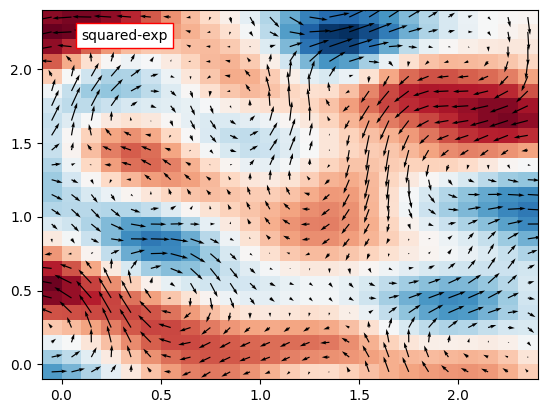

In [110]:
%%time
import numpy as np
from gptide import GPtideScipy
import matplotlib.pyplot as plt


np.random.seed(1)
noise = 0.01
# η = 10.
# ℓ = 900.
# γ = 1.5
covparams = (10., 2*0.25, 3.5)

dx = 0.1
dy = 0.1

###
# Domain size parameters
N = 25

# Input data points
xd = np.arange(0,dx*N,dx)[:,None]-dx/2
yd = np.arange(0,dy*N,dy)[:,None]-dy/2

# Make a grid
Xg, Yg = np.meshgrid(xd, yd)

# Vectorise grid and stack
Xv = Xg.ravel()
Yv = Yg.ravel()
X = np.hstack([Xv[:,None], Yv[:,None]])

print('Creating kernel...')
#K = kernel_psi_2d()
# K = kernel_phi_2d()
#K = kernel_test()
K = kernel_helmholtz_matern
#cov_kwargs = dict(func='matern')
cov_kwargs = dict(func='squared-exp')

#K(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1], covparams[2]).shape
#myK = K(X, X.T, covparams)
#myK
#jitter = 1e-7*np.random.normal(size=(X.T.shape))
#K(X, X.T, covparams).shape
#K = F_np(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1]).shape
#K = d2F_dxdxp_np(X[:,0,None], X[:,1,None], X[:,0,None].T, X[:,1,None].T, covparams[1])

#jitter = 1e-7*np.random.normal(size=(X.shape))

print('Evaluating kernel...')
GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=2, cov_kwargs=cov_kwargs)

# # Use the .prior() method to obtain some samples
zd = GP.prior(samples=1)
u = zd[:GP.N//2]
v = zd[GP.N//2::]

ug = u.reshape(Xg.shape)
vg = v.reshape(Xg.shape)

plt.figure()
plt.pcolormesh(Xg, Yg, ug,  cmap='RdBu')
plt.quiver(Xg, Yg, ug, vg,)
if cov_kwargs['func'] == 'matern':
    plt.text(0.1, 2.2, 'ν = {:3.1f}'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))
else:
    plt.text(0.1, 2.2, 'squared-exp'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))

Evaluating kernel...
CPU times: user 20.4 s, sys: 39 ms, total: 20.4 s
Wall time: 20.3 s


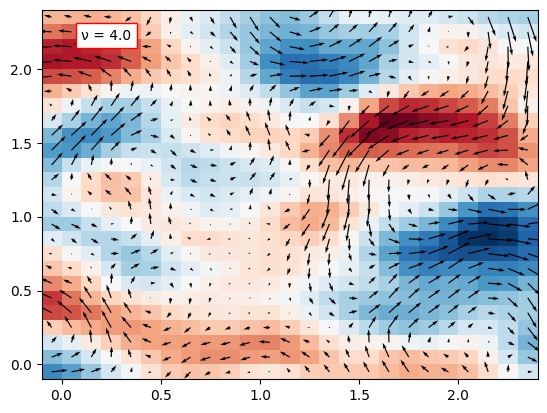

In [111]:
%%time
np.random.seed(1)

covparams = (10., 2*0.25, 4.0)

cov_kwargs = dict(func='matern')
#cov_kwargs = dict(func='squared-exp')

print('Evaluating kernel...')
GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=2, cov_kwargs=cov_kwargs)

# # Use the .prior() method to obtain some samples
zd = GP.prior(samples=1)
u = zd[:GP.N//2]
v = zd[GP.N//2::]

ug = u.reshape(Xg.shape)
vg = v.reshape(Xg.shape)

plt.figure()
plt.pcolormesh(Xg, Yg, ug,  cmap='RdBu')
plt.quiver(Xg, Yg, ug, vg,)
if cov_kwargs['func'] == 'matern':
    plt.text(0.1, 2.2, 'ν = {:3.1f}'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))
else:
    plt.text(0.1, 2.2, 'squared-exp'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))

Evaluating kernel...


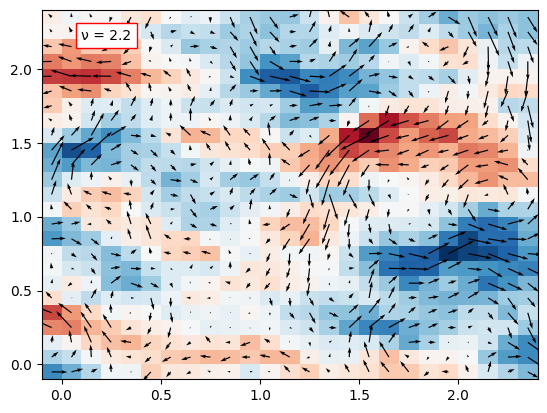

In [103]:
np.random.seed(1)

covparams = (10., 2*0.25, 2.25)

cov_kwargs = dict(func='matern')
#cov_kwargs = dict(func='squared-exp')

print('Evaluating kernel...')
GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=2, cov_kwargs=cov_kwargs)

# # Use the .prior() method to obtain some samples
zd = GP.prior(samples=1)
u = zd[:GP.N//2]
v = zd[GP.N//2::]

ug = u.reshape(Xg.shape)
vg = v.reshape(Xg.shape)

plt.figure()
plt.pcolormesh(Xg, Yg, ug,  cmap='RdBu')
plt.quiver(Xg, Yg, ug, vg,)
if cov_kwargs['func'] == 'matern':
    plt.text(0.1, 2.2, 'ν = {:3.1f}'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))
else:
    plt.text(0.1, 2.2, 'squared-exp'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))

Evaluating kernel...


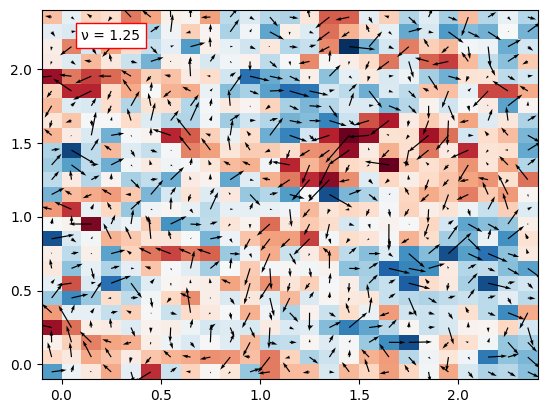

In [105]:
np.random.seed(1)

covparams = (10., 2*0.25, 1.25)

cov_kwargs = dict(func='matern')
#cov_kwargs = dict(func='squared-exp')

print('Evaluating kernel...')
GP = GPtideScipy(X, X.copy(), noise, K, covparams, P=2, cov_kwargs=cov_kwargs)

# # Use the .prior() method to obtain some samples
zd = GP.prior(samples=1)
u = zd[:GP.N//2]
v = zd[GP.N//2::]

ug = u.reshape(Xg.shape)
vg = v.reshape(Xg.shape)

plt.figure()
plt.pcolormesh(Xg, Yg, ug,  cmap='RdBu')
plt.quiver(Xg, Yg, ug, vg,)
if cov_kwargs['func'] == 'matern':
    plt.text(0.1, 2.2, 'ν = {:3.2f}'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))
else:
    plt.text(0.1, 2.2, 'squared-exp'.format(covparams[2]),
            bbox=dict(facecolor='w', edgecolor='red'))